# Importação de biblioteca

In [1]:
import pandas as pd

# Pré-processamento dos dados

In [2]:
dataframe = pd.read_csv('../data/apple_stock.csv')

In [3]:
#Identificando valores nulos

dataframe.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

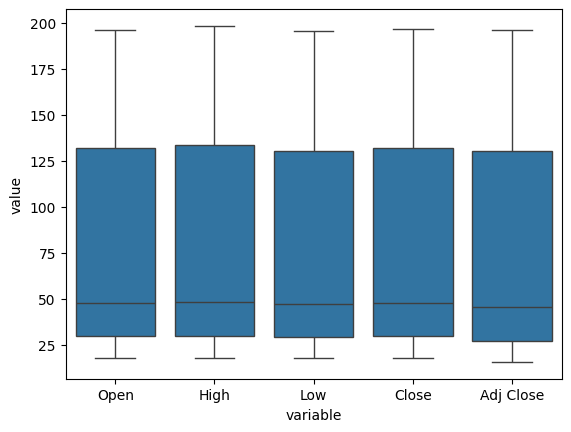

In [4]:
# Verificação de outliers
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="variable", y="value", data=pd.melt(dataframe.iloc[:, 1:-1]))

plt.show()

# EDA

In [5]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


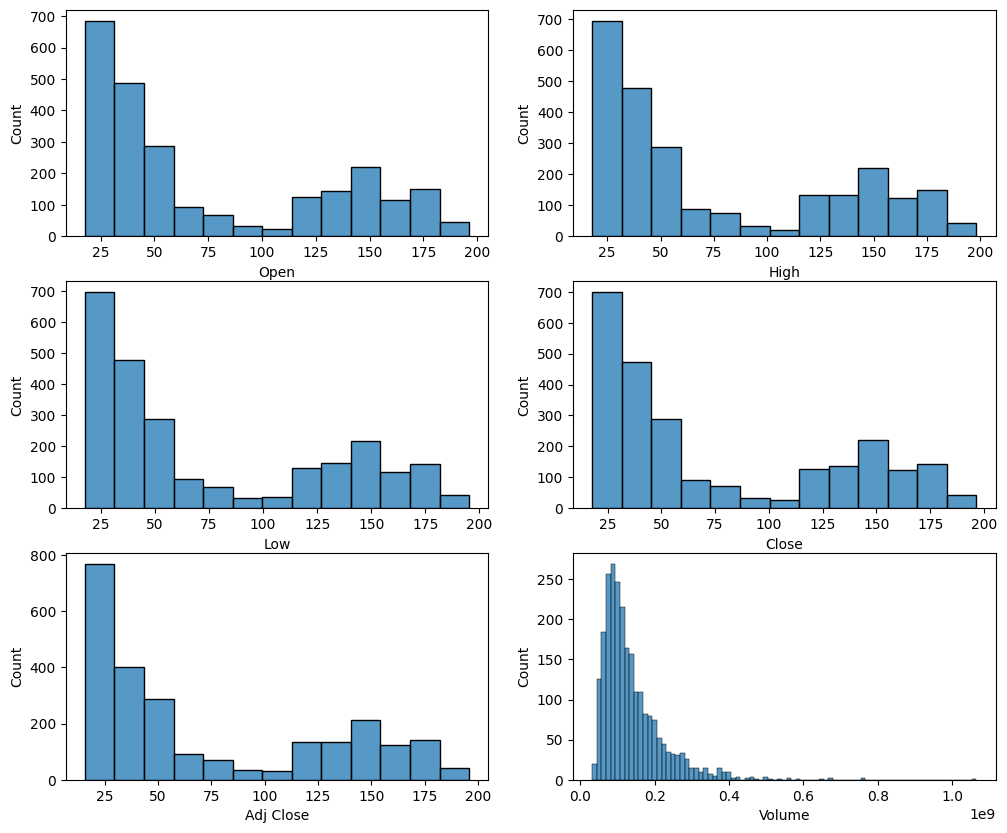

In [21]:
# Distribuição dos preços

f, axes = plt.subplots(3, 2, figsize=(12, 10))
for coluna, ax in zip(dataframe.columns[1:], axes.flatten()):
    sns.histplot(data= dataframe, x= coluna, ax=ax)

<Axes: xlabel='None', ylabel='value'>

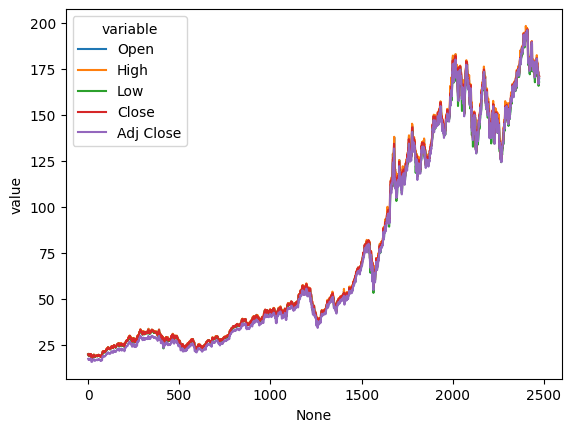

In [72]:
dataframe_to_plot = pd.melt(dataframe.iloc[:, 1:-1], ignore_index=False)
sns.lineplot(x=dataframe_to_plot.index, y='value', hue='variable', 
             data=dataframe_to_plot)

In [71]:
pd.melt(dataframe.iloc[:, 1:-1], ignore_index=False)

,variable,value
0,Open,19.845715
1,Open,19.745001
2,Open,19.194643
3,Open,19.440001
4,Open,19.243214
...,...,...
2470,Adj Close,170.874893
2471,Adj Close,166.670425
2472,Adj Close,167.998672
2473,Adj Close,170.065933


# Modelagem

In [30]:
dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600
...,...,...,...,...,...,...,...
2470,2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2471,2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300
2472,2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100
2473,2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000


## Criação do modelo

In [47]:
X = dataframe[['Open', 'Volume']]
y = dataframe['High'].shift(1)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[1:], test_size=0.33, random_state=42, shuffle = False)

In [81]:
X_train

,Open,Volume
0,19.845715,234684800
1,19.745001,392467600
2,19.194643,412610800
3,19.440001,317209200
4,19.243214,258529600
...,...,...
1652,93.709999,121214000
1653,94.367500,103625600
1654,93.750000,90329200
1655,94.187500,158130000


In [82]:
y_train

1        19.893929
2        19.775000
3        19.528570
4        19.498571
5        19.484285
           ...    
1653     94.904999
1654     94.550003
1655     95.230003
1656     96.297501
1657    106.415001
Name: High, Length: 1657, dtype: float64

In [76]:
X[1:]

,Open,Volume
1,19.745001,392467600
2,19.194643,412610800
3,19.440001,317209200
4,19.243214,258529600
5,19.528570,279148800
...,...,...
2470,171.880005,57157000
2471,170.369995,70625300
2472,166.910004,58499100
2473,169.020004,51131000


In [73]:
X_train

,Open,Volume
1,19.745001,392467600
2,19.194643,412610800
3,19.440001,317209200
4,19.243214,258529600
5,19.528570,279148800
...,...,...
1653,94.367500,103625600
1654,93.750000,90329200
1655,94.187500,158130000
1656,102.885002,374336800


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Avaliação do modelo

In [51]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5.123267252398226
R-squared: 0.988555835982513


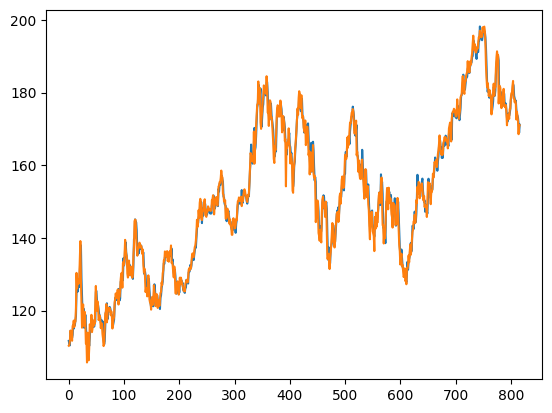

In [59]:
plt.plot(y_test.to_list())
plt.plot(y_pred)